In [1]:
from autograd import Value
import matplotlib.pyplot as plt
%matplotlib inline
import math
from nn import Linear, MLP

In [2]:

x1 = Value(2.0, label = 'x1')
x2 = Value(6.0, label = 'x2')

w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')

b = Value(0.6, label = 'b')
# x1w1 + x2w2 + b
x1w1 = x1*w1; x1w1.label = 'x1w1'
x2w2 = x2*w2; x2w2.label = 'x2w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
x1w1x2w2b = x1w1x2w2 + b; x1w1x2w2b.label = 'x1w1x2w2 + b'
o = x1w1x2w2b.relu(); o.label = 'o'

graph = draw_dot(o)
graph.view()

NameError: name 'draw_dot' is not defined

In [ ]:
from nn import Linear
w = Linear(1, 3)
x = []
t = w(x)
print(t)
print(w)

In [ ]:
import torch
a = torch.nn.Linear(1, 2)
a

In [ ]:
a = torch.tensor([[1,2],[3,4]])
b = torch.tensor([[1,2], [3,4]])
a@b

In [ ]:
a = [[1,2], [3,4]]
b = [[1,2], [3,4]]

In [ ]:
from nn import Neuron
n = Neuron(2)
x = [2.0, 3.0]
out = n(x)
out


100


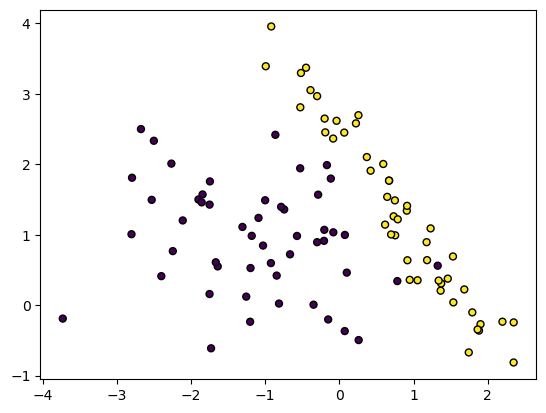

In [2]:
# 100x2 * 2x4
from sklearn.datasets import make_classification
X1, Y1 = make_classification(
    n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1, random_state = 15
)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")
print(len(X1))

In [134]:
class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.fc1 = Linear(input_size, hidden_size, activation='relu')
        self.fc2 = Linear(hidden_size, hidden_size, activation='relu')
        self.fc3 = Linear(hidden_size, hidden_size, activation='relu')
        self.fc4 = Linear(hidden_size, output_size, activation='sigmoid')
        self.layers = [self.fc1, self.fc2, self.fc3, self.fc4]
    def __call__(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        return x[0] if len(x) == 1 else x
    def parameters(self):
        p = []
        for l in self.layers:
            p.extend(l.parameters())
        return p
network = SimpleNN(2, 3, 1)

# n = MLP(3, [4,4,1])

In [130]:
xs = [
    [2.0,3.0,-1.0],
    [3.0,-1.0,0.5],
    [0.5,1.0,1.0],
    [1.0,1.0,-1.0]
]
ys = [1.0, 0.0, 0.0, 1.0]

In [132]:
lr = 1e-1
for k in range(300):
    ypred = [network(x) for x in xs]
    loss = sum((yout - ygt) ** 2 for ygt, yout in zip(ys, ypred))
    for p in network.parameters():
        p.grad = 0.0
    # Backprop
    loss.backward()

    for p in network.parameters():
        p.data = p.data-lr*p.grad
    
    print(k, loss.data)
    

0 0.46477390502062976
1 0.45939429841540735
2 0.4531672737367294
3 0.4481020328600036
4 0.4426094269270683
5 0.4378016713356342
6 0.4329017120317162
7 0.42844320672114233
8 0.42387027714763603
9 0.4196919173273592
10 0.41531011858835865
11 0.41133504814451816
12 0.4071249261190557
13 0.4031140452058288
14 0.39911983619625124
15 0.39504541994173364
16 0.3910770524820401
17 0.38706351192762556
18 0.38297873729032655
19 0.3788967740300912
20 0.3748144573294907
21 0.3706156753917179
22 0.3663781261717759
23 0.36207777319303547
24 0.35770490057975324
25 0.3532514402907405
26 0.348709907964307
27 0.34407328210460325
28 0.33933497627423903
29 0.334488833525474
30 0.32952913519883126
31 0.3244506223054555
32 0.3192485287214253
33 0.3139186257298277
34 0.30845727754964575
35 0.30286150747896934
36 0.297129074171785
37 0.2912585573628289
38 0.285249452049558
39 0.2791022697304595
40 0.2730721561576309
41 0.2670746885904515
42 0.26099068367258127
43 0.2548116162932179
44 0.2485458156196513
45 0.2

In [133]:
ypred = [network(x) for x in xs]
ypred

[Value(data=0.9999999999323461 label = ),
 Value(data=0.007681267956200524 label = ),
 Value(data=0.056075510273722096 label = ),
 Value(data=0.9689484016393609 label = )]

In [137]:
epochs = 100
lr = 1e-2
# Training loop

for epoch in range(epochs):
    for i in range(len(X1)):
        x = X1[i]
        y = Y1[i]

        # Forward prop
        y_hat = network(x)
        # print("y_hat = ", y_hat)
        # Calculate loss
        loss = -1.0 * (y * y_hat.log() + (1-y) * (1-y_hat).log())
        print("Training loss = ", loss.data)
        # Setting grads to zero
        for p in network.parameters():
            p.grad = 0.0
        # Backprop
        loss.backward()
        # Updating weights
        for p in network.parameters():
            p.data = p.data-lr*p.grad
        

            

Training loss =  0.6631603066552487
Training loss =  0.7265617571875226
Training loss =  0.7238980753006568
Training loss =  0.7212476824499631
Training loss =  0.6683161606295991
Training loss =  0.6659432575684909
Training loss =  0.7236129532705645
Training loss =  0.6660832571522886
Training loss =  0.7234650550539061
Training loss =  0.6662225787440696
Training loss =  0.7233179152458618
Training loss =  0.7206704170733832
Training loss =  0.7180361296292956
Training loss =  0.7154149887821263
Training loss =  0.7128069305265742
Training loss =  0.676368795251337
Training loss =  0.673955698399478
Training loss =  0.715216259658861
Training loss =  0.6740567180912297
Training loss =  0.6716551631254176
Training loss =  0.7176130784151284
Training loss =  0.7149940489897841
Training loss =  0.7123880918592953
Training loss =  0.7097951431690455
Training loss =  0.6792743869824319
Training loss =  0.7097176889676265
Training loss =  0.7071380716860834
Training loss =  0.681852065988

In [7]:
print(network.parameters())

[Value(data=-0.9235279291500622 label = ), Value(data=0.2638207592953241 label = ), Value(data=-0.7261690546896737 label = ), Value(data=-0.5631476939593063 label = ), Value(data=-0.6155505875915814 label = ), Value(data=0.5027835923573305 label = ), Value(data=-0.1977449675525027 label = ), Value(data=0.6897684764904062 label = ), Value(data=0.7840232733501777 label = ), Value(data=-0.43033009356724716 label = ), Value(data=0.6635828068305183 label = ), Value(data=0.5805929278676747 label = ), Value(data=0.7452610142202645 label = ), Value(data=0.4473875503273641 label = ), Value(data=-0.9079511180171245 label = ), Value(data=-0.1745658788878477 label = ), Value(data=0.4414496452245298 label = ), Value(data=0.5525592671382336 label = ), Value(data=0.6873973464350884 label = ), Value(data=0.27252592393485897 label = ), Value(data=0.8937442209354518 label = ), Value(data=-0.01196377909556312 label = ), Value(data=-0.4557307546292191 label = ), Value(data=-0.5439744795851955 label = ), V

In [21]:
a = [1,2]
b = [4,5,6]
for x1, w1 in zip(a, b):
    print(x1, w1)

1 4
2 5
